In [2]:
import tensorflow as tf
tf.enable_eager_execution()
from random import randint
from numpy import array
from numpy import argmax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
def one_hot_decode(encoded_seq):
	return [argmax(vector) for vector in encoded_seq]

In [4]:
# generate a sequence of random numbers in [0, 99]
def generate_sequence(length=1000):
	return [randint(0, 99) for _ in range(length)]


In [5]:
# one hot encode sequence
def one_hot_encode(sequence, n_unique=100):
	encoding = list()
	for value in sequence:
		vector = [0 for _ in range(n_unique)]
		vector[value] = 1
		encoding.append(vector)
	return array(encoding)

In [6]:
# generate data for the lstm
def generate_data():
	# generate sequence
	sequence = generate_sequence()
	# one hot encode
	encoded = one_hot_encode(sequence)
	# convert to 3d for input
	X = encoded.reshape(encoded.shape[0], 1, encoded.shape[1])
	return X, encoded

In [7]:
X,y = generate_data()
X_train = X[:750,]
y_train = y[:750,]
X_test = X[:250,]
y_test = y[:250,]

In [8]:
print(X_train.shape[-3:])

(750, 1, 100)


In [9]:
BATCH_SIZE = 10
BUFFER_SIZE = 20
EVALUATION_INTERVAL = 2
EPOCHS = 1000

In [10]:
train_data_single = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [11]:
print(X_train.shape[-4:])

(750, 1, 100)


In [12]:
# define model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(15, input_shape=X_train.shape[-2:]))
model.add(tf.keras.layers.Dense(100, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
single_step_history = model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=5)


Epoch 1/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.1046 - acc: 1.0000 - val_loss: 0.1025 - val_acc: 1.0000
Epoch 2/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.1012 - acc: 1.0000 - val_loss: 0.1021 - val_acc: 1.0000
Epoch 3/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0835 - acc: 1.0000 - val_loss: 0.1017 - val_acc: 1.0000
Epoch 4/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0937 - acc: 1.0000 - val_loss: 0.1013 - val_acc: 1.0000
Epoch 5/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0857 - acc: 1.0000 - val_loss: 0.1010 - val_acc: 1.0000
Epoch 6/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0859 - acc: 1.0000 - val_loss: 0.1007 - val_acc: 1.0000
Epoch 7/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.1030 - acc: 1.0000 - val_loss: 0.1005 - val_acc: 1.0000
Epoch 8/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0683 - a

2/2 [==============================] - 0s 18ms/step - loss: 0.1786 - acc: 1.0000 - val_loss: 0.0935 - val_acc: 1.0000
Epoch 64/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0790 - acc: 1.0000 - val_loss: 0.0935 - val_acc: 1.0000
Epoch 65/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1062 - acc: 1.0000 - val_loss: 0.0935 - val_acc: 1.0000
Epoch 66/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0729 - acc: 1.0000 - val_loss: 0.0934 - val_acc: 1.0000
Epoch 67/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.0746 - acc: 1.0000 - val_loss: 0.0934 - val_acc: 1.0000
Epoch 68/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0863 - acc: 1.0000 - val_loss: 0.0934 - val_acc: 1.0000
Epoch 69/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0889 - acc: 1.0000 - val_loss: 0.0934 - val_acc: 1.0000
Epoch 70/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0894 - acc: 1.

Epoch 125/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0597 - acc: 1.0000 - val_loss: 0.0865 - val_acc: 1.0000
Epoch 126/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0586 - acc: 1.0000 - val_loss: 0.0864 - val_acc: 1.0000
Epoch 127/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0871 - acc: 1.0000 - val_loss: 0.0863 - val_acc: 1.0000
Epoch 128/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0560 - acc: 1.0000 - val_loss: 0.0862 - val_acc: 1.0000
Epoch 129/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0729 - acc: 1.0000 - val_loss: 0.0860 - val_acc: 1.0000
Epoch 130/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.1046 - acc: 1.0000 - val_loss: 0.0859 - val_acc: 1.0000
Epoch 131/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0708 - acc: 1.0000 - val_loss: 0.0858 - val_acc: 1.0000
Epoch 132/1000
2/2 [==============================] - 0s 24ms/step - 

2/2 [==============================] - 0s 26ms/step - loss: 0.0483 - acc: 1.0000 - val_loss: 0.0814 - val_acc: 1.0000
Epoch 187/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0650 - acc: 1.0000 - val_loss: 0.0814 - val_acc: 1.0000
Epoch 188/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.0647 - acc: 1.0000 - val_loss: 0.0814 - val_acc: 1.0000
Epoch 189/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0614 - acc: 1.0000 - val_loss: 0.0812 - val_acc: 1.0000
Epoch 190/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0775 - acc: 1.0000 - val_loss: 0.0810 - val_acc: 1.0000
Epoch 191/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0820 - acc: 1.0000 - val_loss: 0.0808 - val_acc: 1.0000
Epoch 192/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0808 - acc: 1.0000 - val_loss: 0.0805 - val_acc: 1.0000
Epoch 193/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0773 - 

Epoch 248/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0548 - acc: 1.0000 - val_loss: 0.0747 - val_acc: 1.0000
Epoch 249/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1590 - acc: 1.0000 - val_loss: 0.0747 - val_acc: 1.0000
Epoch 250/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0539 - acc: 1.0000 - val_loss: 0.0746 - val_acc: 1.0000
Epoch 251/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0537 - acc: 1.0000 - val_loss: 0.0746 - val_acc: 1.0000
Epoch 252/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0576 - acc: 1.0000 - val_loss: 0.0746 - val_acc: 1.0000
Epoch 253/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0822 - acc: 1.0000 - val_loss: 0.0745 - val_acc: 1.0000
Epoch 254/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0671 - acc: 1.0000 - val_loss: 0.0745 - val_acc: 1.0000
Epoch 255/1000
2/2 [==============================] - 0s 18ms/step - 

2/2 [==============================] - 0s 18ms/step - loss: 0.0536 - acc: 1.0000 - val_loss: 0.0697 - val_acc: 1.0000
Epoch 310/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0646 - acc: 1.0000 - val_loss: 0.0695 - val_acc: 1.0000
Epoch 311/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0501 - acc: 1.0000 - val_loss: 0.0694 - val_acc: 1.0000
Epoch 312/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0770 - acc: 1.0000 - val_loss: 0.0693 - val_acc: 1.0000
Epoch 313/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0495 - acc: 1.0000 - val_loss: 0.0692 - val_acc: 1.0000
Epoch 314/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0500 - acc: 1.0000 - val_loss: 0.0691 - val_acc: 1.0000
Epoch 315/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0730 - acc: 1.0000 - val_loss: 0.0690 - val_acc: 1.0000
Epoch 316/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0709 - 

2/2 [==============================] - 0s 19ms/step - loss: 0.0405 - acc: 1.0000 - val_loss: 0.0654 - val_acc: 1.0000
Epoch 371/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0394 - acc: 1.0000 - val_loss: 0.0654 - val_acc: 1.0000
Epoch 372/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0695 - acc: 1.0000 - val_loss: 0.0654 - val_acc: 1.0000
Epoch 373/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0344 - acc: 1.0000 - val_loss: 0.0654 - val_acc: 1.0000
Epoch 374/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0562 - acc: 1.0000 - val_loss: 0.0654 - val_acc: 1.0000
Epoch 375/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0416 - acc: 1.0000 - val_loss: 0.0654 - val_acc: 1.0000
Epoch 376/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0719 - acc: 1.0000 - val_loss: 0.0653 - val_acc: 1.0000
Epoch 377/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0713 - 

2/2 [==============================] - 0s 20ms/step - loss: 0.0366 - acc: 1.0000 - val_loss: 0.0604 - val_acc: 1.0000
Epoch 432/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0504 - acc: 1.0000 - val_loss: 0.0604 - val_acc: 1.0000
Epoch 433/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0649 - acc: 1.0000 - val_loss: 0.0603 - val_acc: 1.0000
Epoch 434/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0358 - acc: 1.0000 - val_loss: 0.0603 - val_acc: 1.0000
Epoch 435/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0414 - acc: 1.0000 - val_loss: 0.0602 - val_acc: 1.0000
Epoch 436/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0596 - acc: 1.0000 - val_loss: 0.0602 - val_acc: 1.0000
Epoch 437/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1281 - acc: 1.0000 - val_loss: 0.0602 - val_acc: 1.0000
Epoch 438/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.0469 - 

2/2 [==============================] - 0s 23ms/step - loss: 0.0494 - acc: 1.0000 - val_loss: 0.0569 - val_acc: 1.0000
Epoch 493/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0425 - acc: 1.0000 - val_loss: 0.0567 - val_acc: 1.0000
Epoch 494/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0520 - acc: 1.0000 - val_loss: 0.0566 - val_acc: 1.0000
Epoch 495/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0504 - acc: 1.0000 - val_loss: 0.0565 - val_acc: 1.0000
Epoch 496/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0523 - acc: 1.0000 - val_loss: 0.0564 - val_acc: 1.0000
Epoch 497/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0547 - acc: 1.0000 - val_loss: 0.0563 - val_acc: 1.0000
Epoch 498/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0434 - acc: 1.0000 - val_loss: 0.0562 - val_acc: 1.0000
Epoch 499/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0547 - 

Epoch 554/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0628 - acc: 1.0000 - val_loss: 0.0531 - val_acc: 1.0000
Epoch 555/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0394 - acc: 1.0000 - val_loss: 0.0531 - val_acc: 1.0000
Epoch 556/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0490 - acc: 1.0000 - val_loss: 0.0531 - val_acc: 1.0000
Epoch 557/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0481 - acc: 1.0000 - val_loss: 0.0531 - val_acc: 1.0000
Epoch 558/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0435 - acc: 1.0000 - val_loss: 0.0531 - val_acc: 1.0000
Epoch 559/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0329 - acc: 1.0000 - val_loss: 0.0531 - val_acc: 1.0000
Epoch 560/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0353 - acc: 1.0000 - val_loss: 0.0530 - val_acc: 1.0000
Epoch 561/1000
2/2 [==============================] - 0s 18ms/step - 

2/2 [==============================] - 0s 18ms/step - loss: 0.0544 - acc: 1.0000 - val_loss: 0.0493 - val_acc: 1.0000
Epoch 616/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.0514 - acc: 1.0000 - val_loss: 0.0493 - val_acc: 1.0000
Epoch 617/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0373 - acc: 1.0000 - val_loss: 0.0492 - val_acc: 1.0000
Epoch 618/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0333 - acc: 1.0000 - val_loss: 0.0492 - val_acc: 1.0000
Epoch 619/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0347 - acc: 1.0000 - val_loss: 0.0491 - val_acc: 1.0000
Epoch 620/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0496 - acc: 1.0000 - val_loss: 0.0491 - val_acc: 1.0000
Epoch 621/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0313 - acc: 1.0000 - val_loss: 0.0490 - val_acc: 1.0000
Epoch 622/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0388 - 

Epoch 677/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0483 - acc: 1.0000 - val_loss: 0.0467 - val_acc: 1.0000
Epoch 678/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0425 - acc: 1.0000 - val_loss: 0.0466 - val_acc: 1.0000
Epoch 679/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0395 - acc: 1.0000 - val_loss: 0.0464 - val_acc: 1.0000
Epoch 680/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0330 - acc: 1.0000 - val_loss: 0.0463 - val_acc: 1.0000
Epoch 681/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0532 - acc: 1.0000 - val_loss: 0.0462 - val_acc: 1.0000
Epoch 682/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0335 - acc: 1.0000 - val_loss: 0.0461 - val_acc: 1.0000
Epoch 683/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0442 - acc: 1.0000 - val_loss: 0.0460 - val_acc: 1.0000
Epoch 684/1000
2/2 [==============================] - 0s 19ms/step - 

2/2 [==============================] - 0s 18ms/step - loss: 0.0895 - acc: 1.0000 - val_loss: 0.0434 - val_acc: 1.0000
Epoch 739/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0333 - acc: 1.0000 - val_loss: 0.0434 - val_acc: 1.0000
Epoch 740/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0373 - acc: 1.0000 - val_loss: 0.0434 - val_acc: 1.0000
Epoch 741/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0518 - acc: 1.0000 - val_loss: 0.0434 - val_acc: 1.0000
Epoch 742/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0300 - acc: 1.0000 - val_loss: 0.0434 - val_acc: 1.0000
Epoch 743/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0359 - acc: 1.0000 - val_loss: 0.0434 - val_acc: 1.0000
Epoch 744/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0362 - acc: 1.0000 - val_loss: 0.0434 - val_acc: 1.0000
Epoch 745/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0356 - 

Epoch 800/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0275 - acc: 1.0000 - val_loss: 0.0406 - val_acc: 1.0000
Epoch 801/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0305 - acc: 1.0000 - val_loss: 0.0406 - val_acc: 1.0000
Epoch 802/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0300 - acc: 1.0000 - val_loss: 0.0405 - val_acc: 1.0000
Epoch 803/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0491 - acc: 1.0000 - val_loss: 0.0404 - val_acc: 1.0000
Epoch 804/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0277 - acc: 1.0000 - val_loss: 0.0404 - val_acc: 1.0000
Epoch 805/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0414 - acc: 1.0000 - val_loss: 0.0403 - val_acc: 1.0000
Epoch 806/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0313 - acc: 1.0000 - val_loss: 0.0403 - val_acc: 1.0000
Epoch 807/1000
2/2 [==============================] - 0s 20ms/step - 

2/2 [==============================] - 0s 19ms/step - loss: 0.0218 - acc: 1.0000 - val_loss: 0.0386 - val_acc: 1.0000
Epoch 862/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0286 - acc: 1.0000 - val_loss: 0.0386 - val_acc: 1.0000
Epoch 863/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0282 - acc: 1.0000 - val_loss: 0.0385 - val_acc: 1.0000
Epoch 864/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0470 - acc: 1.0000 - val_loss: 0.0385 - val_acc: 1.0000
Epoch 865/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0388 - acc: 1.0000 - val_loss: 0.0383 - val_acc: 1.0000
Epoch 866/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0368 - acc: 1.0000 - val_loss: 0.0382 - val_acc: 1.0000
Epoch 867/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0358 - acc: 1.0000 - val_loss: 0.0381 - val_acc: 1.0000
Epoch 868/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0288 - 

Epoch 923/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0231 - acc: 1.0000 - val_loss: 0.0357 - val_acc: 1.0000
Epoch 924/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0341 - acc: 1.0000 - val_loss: 0.0357 - val_acc: 1.0000
Epoch 925/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0764 - acc: 1.0000 - val_loss: 0.0357 - val_acc: 1.0000
Epoch 926/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0322 - acc: 1.0000 - val_loss: 0.0357 - val_acc: 1.0000
Epoch 927/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0265 - acc: 1.0000 - val_loss: 0.0357 - val_acc: 1.0000
Epoch 928/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0447 - acc: 1.0000 - val_loss: 0.0357 - val_acc: 1.0000
Epoch 929/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0314 - acc: 1.0000 - val_loss: 0.0357 - val_acc: 1.0000
Epoch 930/1000
2/2 [==============================] - 0s 19ms/step - 

2/2 [==============================] - 0s 17ms/step - loss: 0.0320 - acc: 1.0000 - val_loss: 0.0336 - val_acc: 1.0000
Epoch 985/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0277 - acc: 1.0000 - val_loss: 0.0336 - val_acc: 1.0000
Epoch 986/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0234 - acc: 1.0000 - val_loss: 0.0335 - val_acc: 1.0000
Epoch 987/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.0348 - acc: 1.0000 - val_loss: 0.0335 - val_acc: 1.0000
Epoch 988/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0256 - acc: 1.0000 - val_loss: 0.0335 - val_acc: 1.0000
Epoch 989/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.0254 - acc: 1.0000 - val_loss: 0.0334 - val_acc: 1.0000
Epoch 990/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0377 - acc: 1.0000 - val_loss: 0.0333 - val_acc: 1.0000
Epoch 991/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0226 - 

In [14]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()


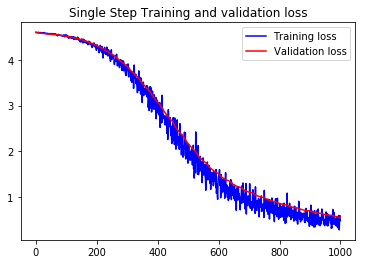

In [15]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')


In [25]:
# evaluate model on new data
X, y = generate_data()
yhat = model.predict(X)
print('Expected:  %s' % one_hot_decode(y))
print('Predicted: %s' % one_hot_decode(yhat))

Expected:  [60, 31, 60, 55, 75, 11, 55, 42, 43, 87, 64, 50, 95, 67, 99, 78, 81, 61, 45, 9, 58, 96, 6, 46, 94, 30, 41, 7, 79, 78, 20, 40, 85, 38, 52, 93, 23, 50, 85, 90, 81, 15, 91, 28, 4, 2, 40, 30, 98, 44, 56, 48, 61, 77, 16, 62, 95, 91, 60, 31, 98, 31, 2, 66, 7, 29, 21, 94, 20, 54, 85, 9, 38, 33, 18, 60, 0, 64, 94, 85, 47, 98, 24, 22, 28, 77, 43, 19, 10, 83, 79, 15, 6, 63, 59, 86, 59, 16, 4, 67, 42, 27, 39, 48, 57, 20, 6, 79, 71, 5, 99, 8, 62, 22, 22, 69, 20, 51, 97, 65, 73, 25, 36, 84, 41, 29, 8, 18, 93, 51, 42, 4, 36, 44, 95, 0, 96, 29, 33, 34, 8, 96, 86, 46, 26, 20, 25, 49, 26, 48, 51, 19, 11, 4, 54, 15, 73, 22, 98, 24, 45, 22, 72, 58, 39, 17, 9, 44, 78, 92, 82, 64, 66, 89, 74, 15, 80, 32, 84, 70, 45, 76, 48, 23, 51, 19, 26, 2, 93, 11, 23, 15, 3, 95, 58, 90, 1, 58, 33, 92, 53, 34, 78, 81, 33, 64, 37, 89, 53, 56, 91, 11, 98, 64, 34, 32, 61, 83, 45, 77, 69, 47, 46, 11, 58, 14, 44, 45, 48, 74, 61, 17, 7, 66, 37, 43, 57, 50, 9, 76, 56, 3, 18, 72, 58, 6, 55, 76, 66, 7, 52, 18, 39, 34, 